# Real Impact Of Inflation

Our project is to uncover the difference between the reported and actual urban inflation. We will be using the CPI data, from the Bureau of Labor Statistics, with and without food and energy costs to answer this question. Additionally, we will also be analyzing the differences in inflation between the various US regions, compared to the national average, over time.

## The Data
@TODO: Insert description of the BLS data

In [31]:
# Importing dependencies
import numpy as np
from pandas_profiling import ProfileReport
from processor import DF_Processor
import warnings
import pandas as pd
import plotly.express as px
import panel as pn
import hvplot.pandas
import geoviews as gv
import cartopy.crs as ccrs
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [32]:
warnings.filterwarnings('ignore')

### Reading/Pre-Processing the Data

In [33]:
# List of non-regional csv titles
non_regional_csv_titles = ['All','Energy','Food','Gasoline', 'Less-Food-Energy']
# List of regional csv titles
regional_csv_titles = ['Midwest', 'Northeast', 'South', 'West']

In [34]:
# Getting and storing non-regional DataFrames
non_regional_dfs = [all_df, energy_df, food_df, gasoline_df, less_food_energy_df] = DF_Processor(non_regional_csv_titles).get_processed_dataframes()
# Getting and storing regional DataFrames
regional_dfs = [midwest_df, northeast_df, south_df, west_df] = DF_Processor(regional_csv_titles,True).get_processed_dataframes()

In [35]:
# Method to display dataframes and titles
def display_data(dataframes,titles):
    # Looping over csv titles and indexes
    for index, title in enumerate(titles):
        # Printing CSV Title and DataFrame Name
        df_title = 'less_food_energy_df' if title == 'Less-Food-Energy' else title.lower()
        print(f'\033[1mCSV Title\033[0m: {title}.csv\n\033[1mDataFrame Name\033[0m: {df_title}_df')
        # Displaying DataFrame
        profile = ProfileReport(dataframes[index], title=f'BLS {df_title.title()} Consumer Price Data Report:')
        profile.to_notebook_iframe()

In [36]:
# Printing non-regional data
display_data(non_regional_dfs,non_regional_csv_titles)

CSV Title: All.csv
DataFrame Name: all_df


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

CSV Title: Energy.csv
DataFrame Name: energy_df


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

CSV Title: Food.csv
DataFrame Name: food_df


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

CSV Title: Gasoline.csv
DataFrame Name: gasoline_df


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

CSV Title: Less-Food-Energy.csv
DataFrame Name: less_food_energy_df_df


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [37]:
# Printing regional data
display_data(regional_dfs,regional_csv_titles)

CSV Title: Midwest.csv
DataFrame Name: midwest_df


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

CSV Title: Northeast.csv
DataFrame Name: northeast_df


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

CSV Title: South.csv
DataFrame Name: south_df


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

CSV Title: West.csv
DataFrame Name: west_df


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Differences in inflation between the Midwest, Northeast, South and West region of the United States

The primary reason why food and energy prices are excluded from CPI calcualtions (and thus reported inflation metrics) is their wide variability across a country as large as the United States. It therefore becomes necessary to analyze prices on a regional basis to better understand this difference and contextualize geographically-specific trends. 

1. How have prices varied between each region when food and energy are taken into consideration?
2. How much have prices increased on average in each region both before and after January 2020?

### Analysis/Visualizations

In [38]:
midwest_df = midwest_df.rename(columns = {'Price':'Midwest'})
northeast_df = northeast_df.rename(columns = {'Price':'Northeast'})
south_df = south_df.rename(columns = {'Price':'South'})
west_df = west_df.rename(columns = {'Price':'West'})

In [39]:
all_regions_df = pd.concat([midwest_df, northeast_df, south_df, west_df], axis=1, join='inner')

all_regions_df.head()

Midwest  Northeast    South     West
Date                                            
2012-01-01  216.368    242.879  220.497  228.980
2012-02-01  216.855    243.850  221.802  229.995
2012-03-01  218.975    245.125  223.314  232.039
2012-04-01  219.405    245.850  224.275  232.561
2012-05-01  219.145    245.709  223.356  233.053

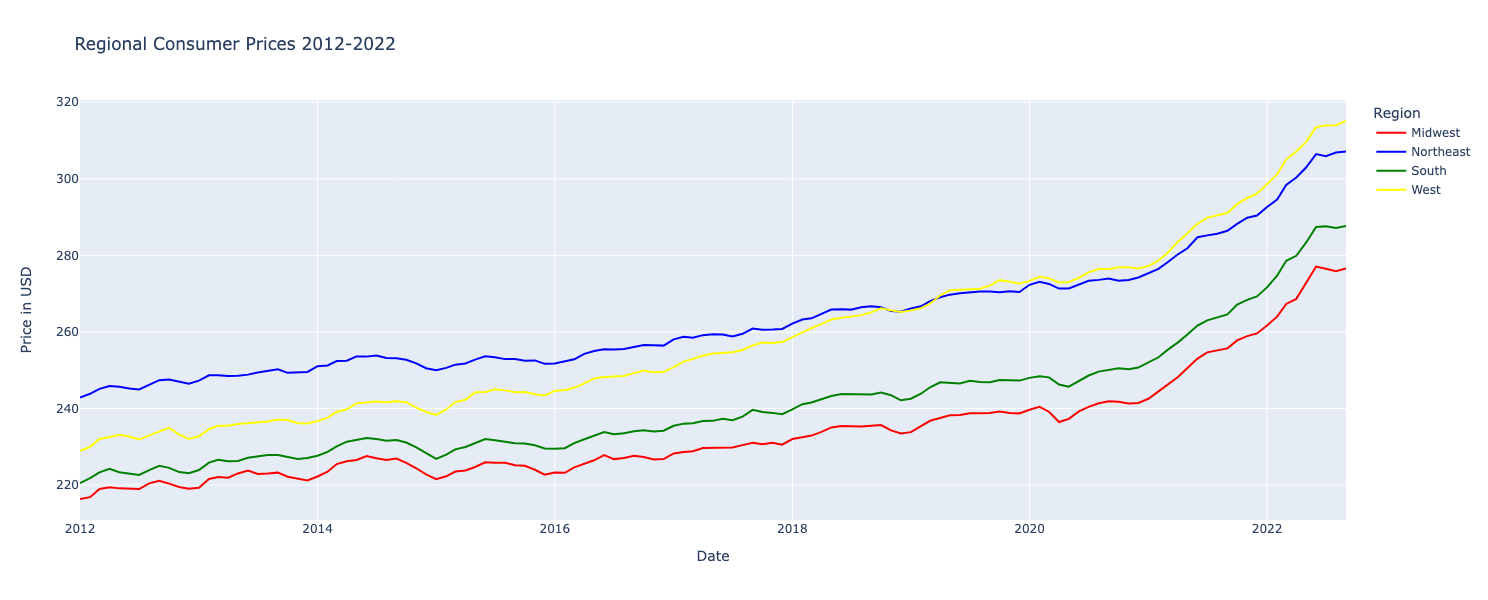

In [40]:
fig = px.line(all_regions_df, 
        labels={'value': 'Price in USD', 'variable': 'Region'}, 
        title="Regional Consumer Prices 2012-2022", color_discrete_sequence=['red','blue','green','yellow'], width=1300, height=600)
fig.show()
fig.write_image("./assets/images/regional.png")

In [41]:
regions_df = pd.DataFrame({
    'Region':['Midwest','Northeast','South','West'],
    'Latitude':[41.881832,40.730610,33.753746,40.759926],
    'Longitude':[-87.623177,-73.935242,-84.386330,-111.884888],
})

In [42]:
all_regions_mapped_df = pd.concat([regions_df[['Region','Latitude','Longitude']]]*129, ignore_index=True).sort_values('Region').reset_index().drop(columns='index')

dates = pd.DataFrame([int(date[:10].replace('-','')) for date in all_regions_df.index.values.astype(str)])

all_regions_mapped_df['Date'] = pd.concat([dates,dates,dates,dates]).reset_index().drop(columns='index')
all_regions_mapped_df['Price'] = pd.concat([all_regions_df[i] for i in all_regions_df.columns]).reset_index()[0]


all_regions_mapped_df = all_regions_mapped_df[['Date','Price', 'Region', 'Latitude', 'Longitude']]

all_regions_mapped_df

Date    Price   Region   Latitude   Longitude
0    20120101  216.368  Midwest  41.881832  -87.623177
1    20120201  216.855  Midwest  41.881832  -87.623177
2    20120301  218.975  Midwest  41.881832  -87.623177
3    20120401  219.405  Midwest  41.881832  -87.623177
4    20120501  219.145  Midwest  41.881832  -87.623177
..        ...      ...      ...        ...         ...
511  20220501  309.645     West  40.759926 -111.884888
512  20220601  313.496     West  40.759926 -111.884888
513  20220701  313.951     West  40.759926 -111.884888
514  20220801  314.013     West  40.759926 -111.884888
515  20220901  315.094     West  40.759926 -111.884888

[516 rows x 5 columns]

In [43]:
regional_prices_plot = all_regions_mapped_df.hvplot.points(
    'Longitude',
    'Latitude',
    geo=True,
    size='Price',
    color='Price',
    cmap='nipy_spectral',
    scale=4,
    groupby='Date',
    ylabel='Latitude',
    xlabel='Longitude',
    clabel='Price',
    clim=(220,315),
    frame_width=1000,
    frame_height=500,
    tiles='OSM',
    title='Monthly Regional Consumer Prices January 2012 to September 2022'
).opts(fontsize={'title': 21.5,
                                                                                                      'labels': 16,
                                                                                                      'xticks': 12,
                                                                                                      'yticks': 12,
                                                                                                      'cticks': 10})
hvplot.save(regional_prices_plot, './assets/html-plots/regions_prices.html')
regional_prices_plot

:DynamicMap   [Date]
   :Overlay
      .Tiles.I  :Tiles   [x,y]
      .Points.I :Points   [Longitude,Latitude]   (Price)

In [44]:
all_df = all_df.rename(columns = {'Price':'National'})

In [45]:
combined_df = pd.concat([all_df, midwest_df, northeast_df, south_df, west_df], axis=1, join='inner')
combined_df.head()

National  Midwest  Northeast    South     West
Date                                                      
2012-01-01   226.665  216.368    242.879  220.497  228.980
2012-02-01   227.663  216.855    243.850  221.802  229.995
2012-03-01   229.392  218.975    245.125  223.314  232.039
2012-04-01   230.085  219.405    245.850  224.275  232.561
2012-05-01   229.815  219.145    245.709  223.356  233.053

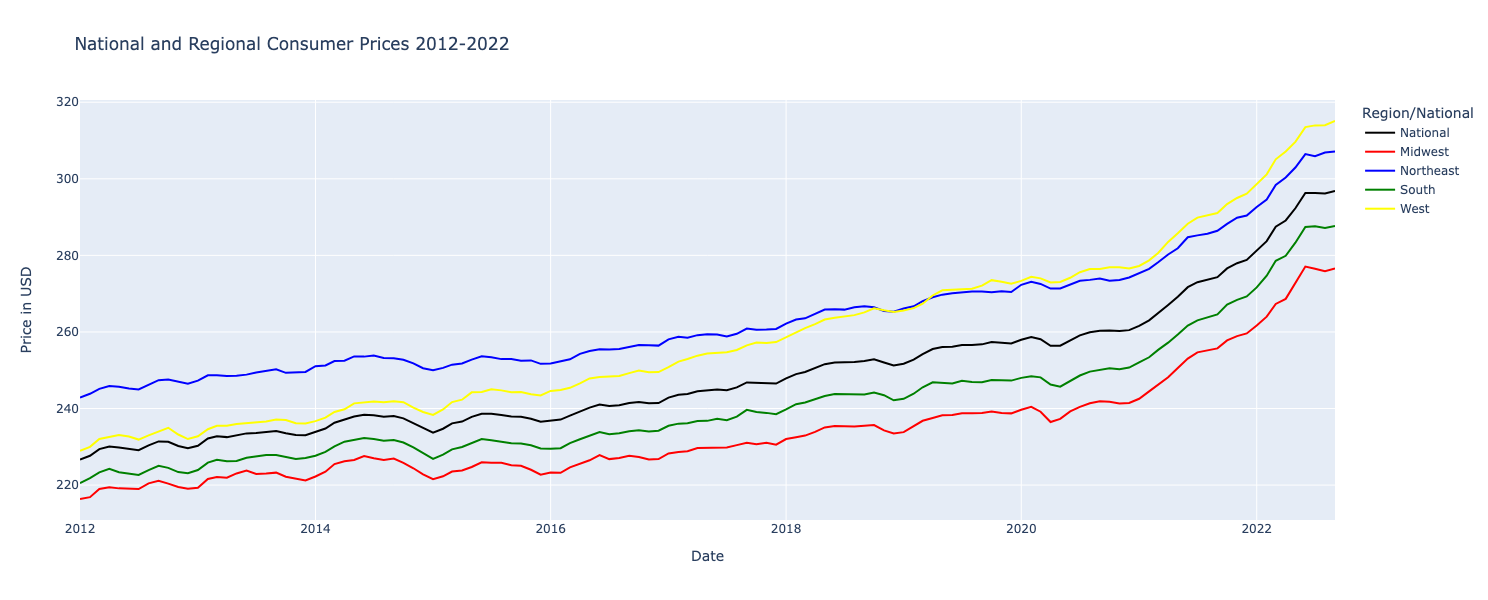

In [46]:
fig = px.line(combined_df, 
        labels={'value': 'Price in USD', 'variable': 'Region/National'}, 
        title="National and Regional Consumer Prices 2012-2022", color_discrete_sequence=['black','red','blue','green','yellow'],
       width=1300, height=600)
fig.show()
fig.write_image("./assets/images/national_regional.png")

In [47]:
combined_corr = combined_df.corr()
combined_corr

National   Midwest  Northeast     South      West
National   1.000000  0.994282   0.999581  0.998443  0.994116
Midwest    0.994282  1.000000   0.993716  0.997840  0.977289
Northeast  0.999581  0.993716   1.000000  0.997695  0.993692
South      0.998443  0.997840   0.997695  1.000000  0.986850
West       0.994116  0.977289   0.993692  0.986850  1.000000

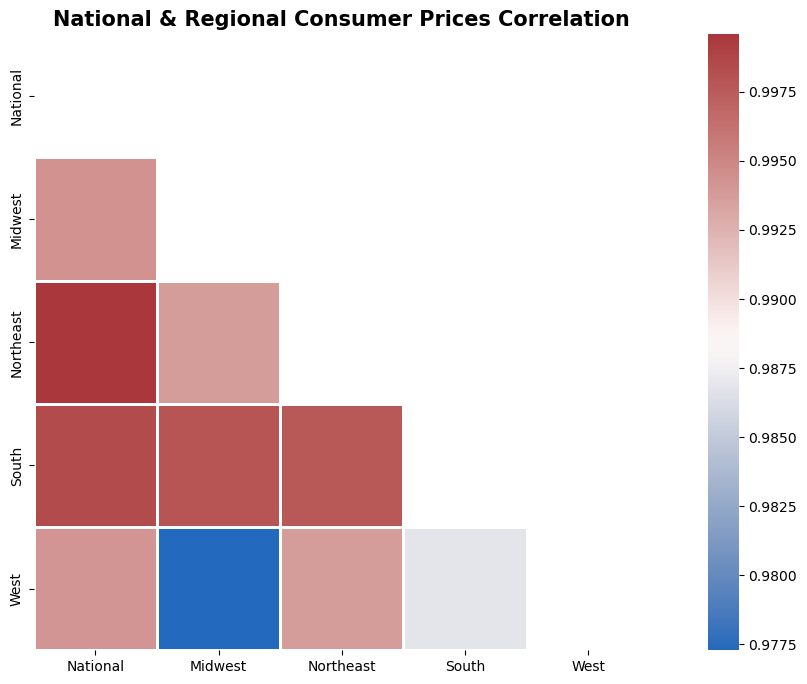

In [48]:
fig = plt.figure(figsize=(15,8),)
plt.title("National & Regional Consumer Prices Correlation", fontsize=15, fontweight='bold')
sns.heatmap(combined_corr,
            square=True,
            linewidth=1,cmap='vlag',
            mask=np.triu(np.ones_like(combined_corr, dtype=bool)));
fig.show()
fig.savefig("./assets/images/nationa_regional_correlation.png")

In [49]:
#find percent change in each reagion per month
all_regions_pct = all_regions_df.pct_change().dropna()
all_regions_pct.tail()

Midwest  Northeast     South      West
Date                                               
2022-05-01  0.015016   0.008704  0.012248  0.008139
2022-06-01  0.016133   0.011600  0.014543  0.012437
2022-07-01 -0.001974  -0.001752  0.000630  0.001451
2022-08-01 -0.002351   0.003069 -0.001530  0.000197
2022-09-01  0.002443   0.000968  0.001699  0.003443

In [50]:
# crate seperate dataframes for dates before and after January 2020
all_regions_pct_b20 = all_regions_pct[:95]
all_regions_pct_a20 = all_regions_pct[95:]

display(all_regions_pct_b20.head())
display(all_regions_pct_a20.head())

Midwest  Northeast     South      West
Date                                               
2012-02-01  0.002251   0.003998  0.005918  0.004433
2012-03-01  0.009776   0.005229  0.006817  0.008887
2012-04-01  0.001964   0.002958  0.004303  0.002250
2012-05-01 -0.001185  -0.000574 -0.004098  0.002116
2012-06-01 -0.000584  -0.002067 -0.001576 -0.001510

Midwest  Northeast     South      West
Date                                               
2020-01-01  0.004004   0.006978  0.002895  0.002773
2020-02-01  0.003050   0.002806  0.001641  0.003922
2020-03-01 -0.005232  -0.002010 -0.001111 -0.001520
2020-04-01 -0.011243  -0.004425 -0.007585 -0.003949
2020-05-01  0.003455   0.000074 -0.002266  0.000546

In [51]:
all_regions_pct_b20_avg = all_regions_pct_b20.mean()
all_regions_pct_a20_avg = all_regions_pct_a20.mean()

display(all_regions_pct_b20_avg)
display(all_regions_pct_a20_avg)

Midwest      0.001043
Northeast    0.001135
South        0.001213
West         0.001842
dtype: float64

Midwest      0.004481
Northeast    0.003874
South        0.004604
West         0.004409
dtype: float64

In [52]:
all_regions_pct_before_2020 = regions_df.copy()
all_regions_pct_before_2020['Average Percentage Change'] = all_regions_pct_b20_avg.values
all_regions_pct_before_2020

Region   Latitude   Longitude  Average Percentage Change
0    Midwest  41.881832  -87.623177                   0.001043
1  Northeast  40.730610  -73.935242                   0.001135
2      South  33.753746  -84.386330                   0.001213
3       West  40.759926 -111.884888                   0.001842

In [53]:
regions_before_2020_plot = all_regions_pct_before_2020.hvplot.points(
    'Longitude',
    'Latitude',
    geo=True,
    size='Average Percentage Change',
    color='Average Percentage Change',
    scale=1300,
    ylabel='Latitude',
    xlabel='Longitude',
    cmap='nipy_spectral',
    clabel='Average Percent Change',
    frame_width=1200,
    frame_height=500,
    tiles='OSM',
    title='Average Regional Consumer Price Percentage Change 2012-2019').opts(fontsize={'title': 21.5,
                                                                                                      'labels': 16,
                                                                                                      'xticks': 12,
                                                                                                      'yticks': 12,
                                                                                                      'cticks': 10})
hvplot.save(regions_before_2020_plot, './assets/html-plots/regions_before_2020.html')
regions_before_2020_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Average Percentage Change)

In [54]:
all_regions_pct_after_2020 = regions_df.copy()
all_regions_pct_after_2020['Average Percentage Change'] = all_regions_pct_a20_avg.values
all_regions_pct_after_2020

Region   Latitude   Longitude  Average Percentage Change
0    Midwest  41.881832  -87.623177                   0.004481
1  Northeast  40.730610  -73.935242                   0.003874
2      South  33.753746  -84.386330                   0.004604
3       West  40.759926 -111.884888                   0.004409

In [55]:
regions_after_2020_plot = all_regions_pct_after_2020.hvplot.points(
    'Longitude',
    'Latitude',
    geo=True,
    size='Average Percentage Change',
    color='Average Percentage Change',
    scale=1300,
    ylabel='Latitude',
    xlabel='Longitude',
    cmap='nipy_spectral',
    clabel='Average Percent Change',
    frame_width=1000,
    frame_height=500,
    tiles='OSM',
    title='Average Regional Consumer Price Percentage Change 2020-2022').opts(fontsize={'title': 21.5,
                                                                                                      'labels': 16,
                                                                                                      'xticks': 12,
                                                                                                      'yticks': 12,
                                                                                                      'cticks': 10})
hvplot.save(regions_after_2020_plot, './assets/html-plots/regions_after_2020.html')
regions_after_2020_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Average Percentage Change)

## Explanation
Prior to January of 2020 prices increaseed by  between .1% and .18% on average per month with the Midwest being the lowest and the west being the highest. After this date They, have increased by between .38% and .46% on average per month with the Northeast being the lowest and the south being the Highest. 